## Titanic - Machine Learning from Disaster  
### Overview   


The data has been split into two groups:  

    -training set (train.csv)
    -test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

**Variable Notes**

`pclass`: A proxy for socio-economic status (SES)
`1st` = Upper
`2nd` = Middle
`3rd` = Lower

`age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`sibsp`: The dataset defines family relations in this way...
`Sibling` = brother, sister, stepbrother, stepsister
`Spouse` = husband, wife (mistresses and fiancés were ignored)

`parch`: The dataset defines family relations in this way...
`Parent` = mother, father
`Child` = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch= 0 for them.

In [8]:
# import the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
training = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [11]:
training["train_test"] = 1
test["train_test"] = 0
test["Survived"] = np.NaN

In [13]:
all_data = pd.concat([training, test])

In [16]:
all_data.head()
%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [22]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [23]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [21]:
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [25]:
for label, content in training.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare
train_test


In [28]:
df_num = training[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch','Fare', 'train_test']]

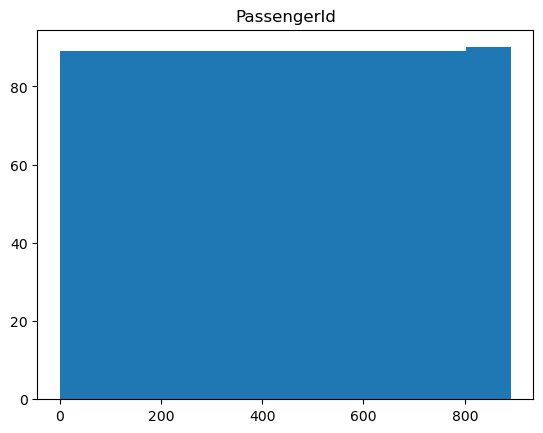

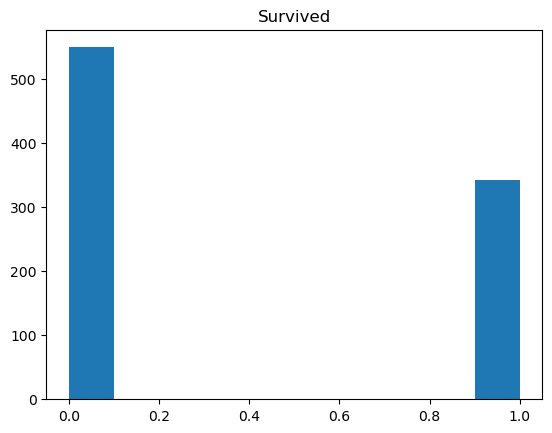

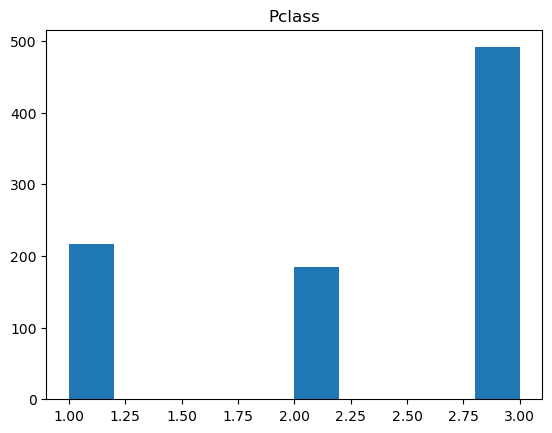

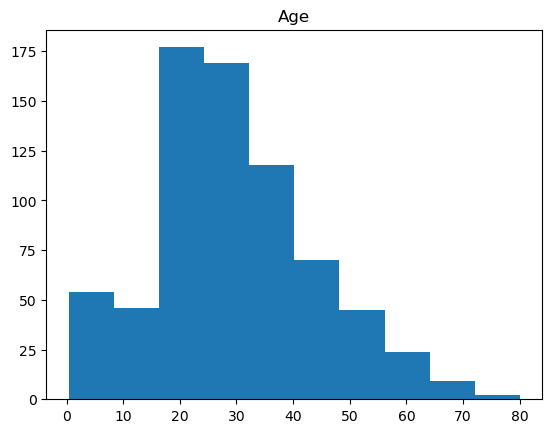

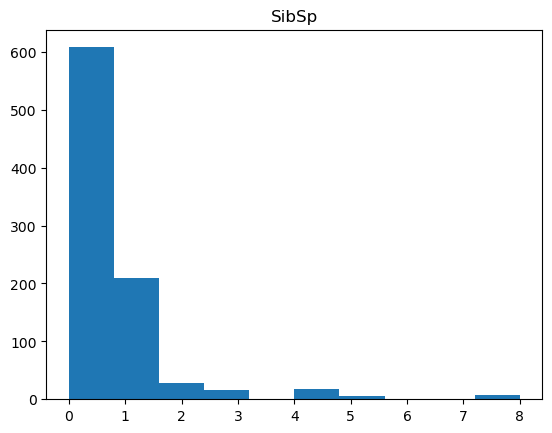

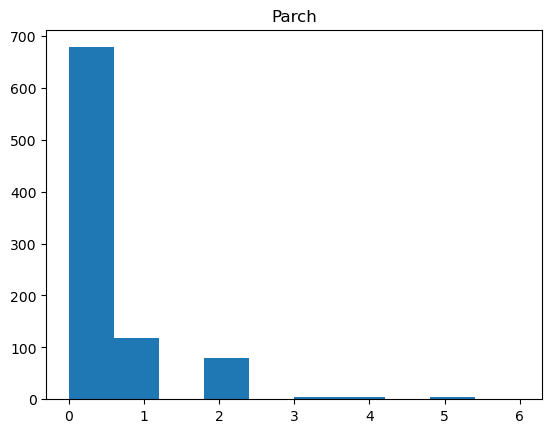

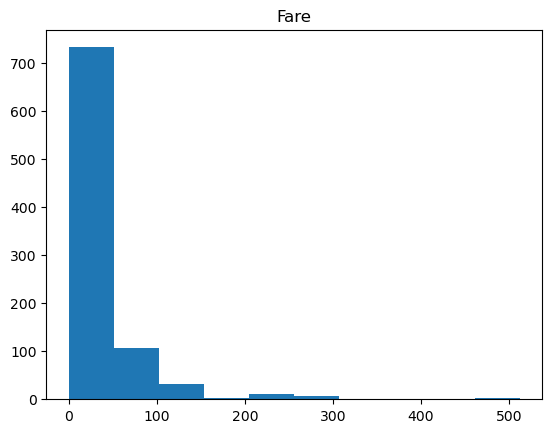

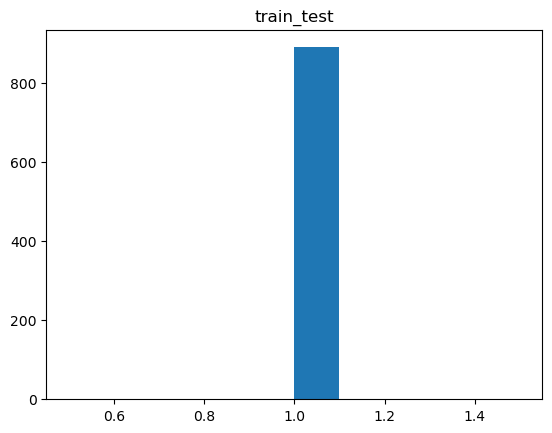

In [29]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot: >

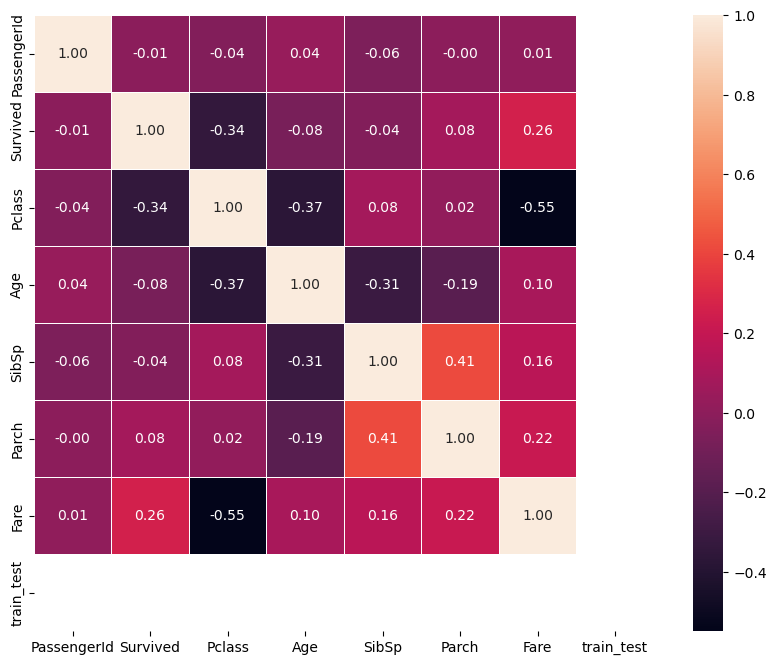

In [35]:
# print(df_num.corr())

import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", linewidths=0.5, ax=ax)

In [36]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [37]:
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

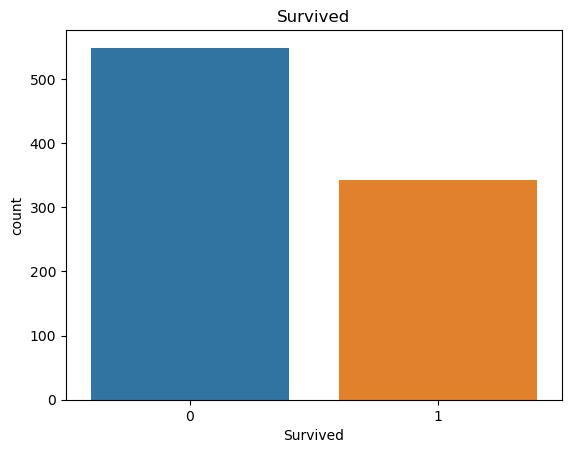

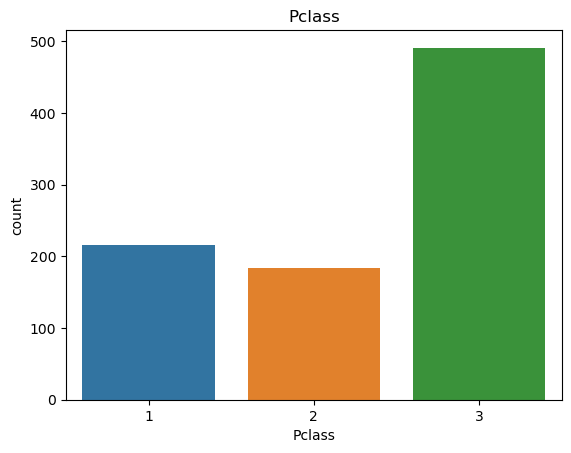

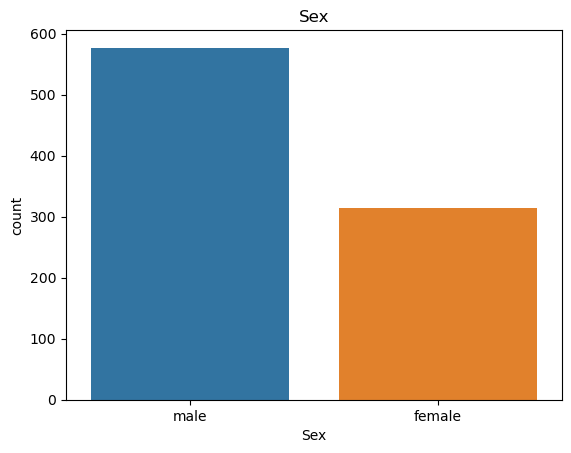

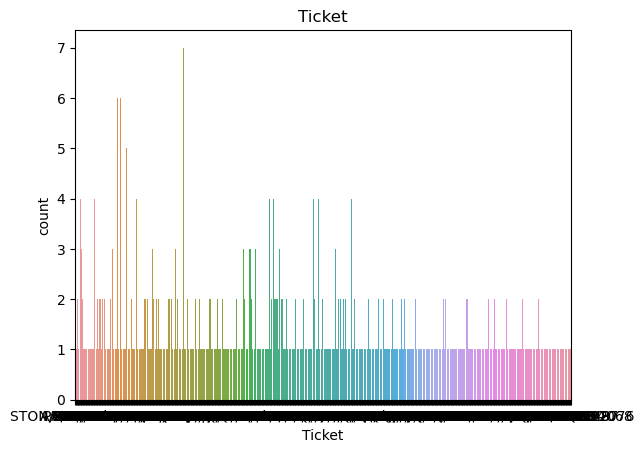

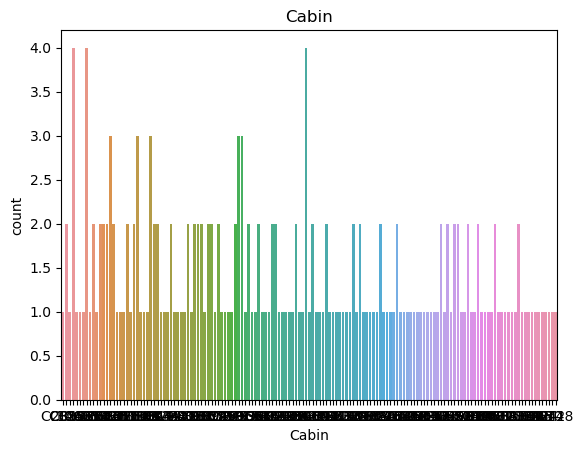

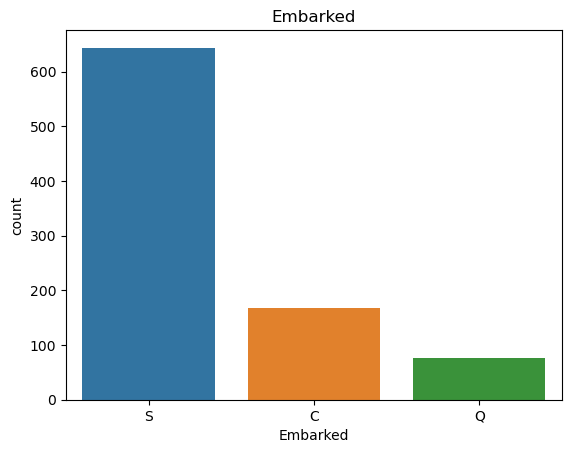

In [50]:
for i in df_cat.columns:
    plt.figure()  # Crear una nueva figura para cada gráfico de barras
    sns.countplot(x=i, data=df_cat)
    plt.title(i)
    plt.show()


In [59]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(training,
index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc ='count'))
print()
print(pd.pivot_table(training, 
index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, 
index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Feature Engineering
1. Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)
2. Tickets - Do different ticket types impact survival rates?
3. Does a person's title relate to survival rates?

In [65]:
df_cat.Cabin.head()
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [66]:
pd.pivot_table(training, 
               index = 'Survived', 
               columns = 'cabin_multiple', 
               values = 'Ticket',
               aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0
